In [25]:
import pandas as pd
import numpy as np
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltcolor 
import seaborn as sns
import plotly.express as px

In [51]:
df = pd.read_csv("owid-covid-data.csv")
vaccinepercapita = pd.read_csv("daily-covid-vaccination-doses-per-capita.csv")
riskmap = pd.read_csv("df_cities_risk_weekly.csv")

In [16]:
# 
df1 = df[df['location'] == "Turkey"]
df1.reset_index(drop=True,inplace=True)

In [31]:
px.line(data_frame=pd.melt(frame=df1,id_vars=['date'],value_vars=['new_cases']),x='date',y='value',color='variable')

In [44]:
import plotly.figure_factory as ff

df = [dict(Task="Weekend lockdown*", Start='2021-03-30', Finish='2021-04-14'),
      dict(Task="Weekend lockdown", Start='2021-04-14', Finish='2021-04-26'),
      dict(Task="Full lockdown", Start='2021-04-26', Finish='2021-05-17'),
      dict(Task="Weekend lockdown", Start='2021-05-17', Finish='2021-05-31')]

fig = ff.create_gantt(df)
fig.show()
        
# *for only high risk cities

In [55]:
px.line(data_frame=pd.melt(frame=df1[370:],id_vars=['date'],value_vars=['new_cases']),x='date',y='value',color='variable')

In [22]:
# Visualizing 10-week data of city risk map from 16 march to 23 may 2021
# Week 6 is the beginning of lockdown (26 april)

import plotly.express as px
fig = px.scatter_geo(riskmap, lat="Latitude",lon="Longitude",color="value",
                     hover_name="city_name", size="value",geojson="Turkey",
                     animation_frame="week_no",center = {"lat": 39.0902, "lon": 34.7129},size_max=30,
                     projection="natural earth",fitbounds='locations')

fig.show()

No handles with labels found to put in legend.


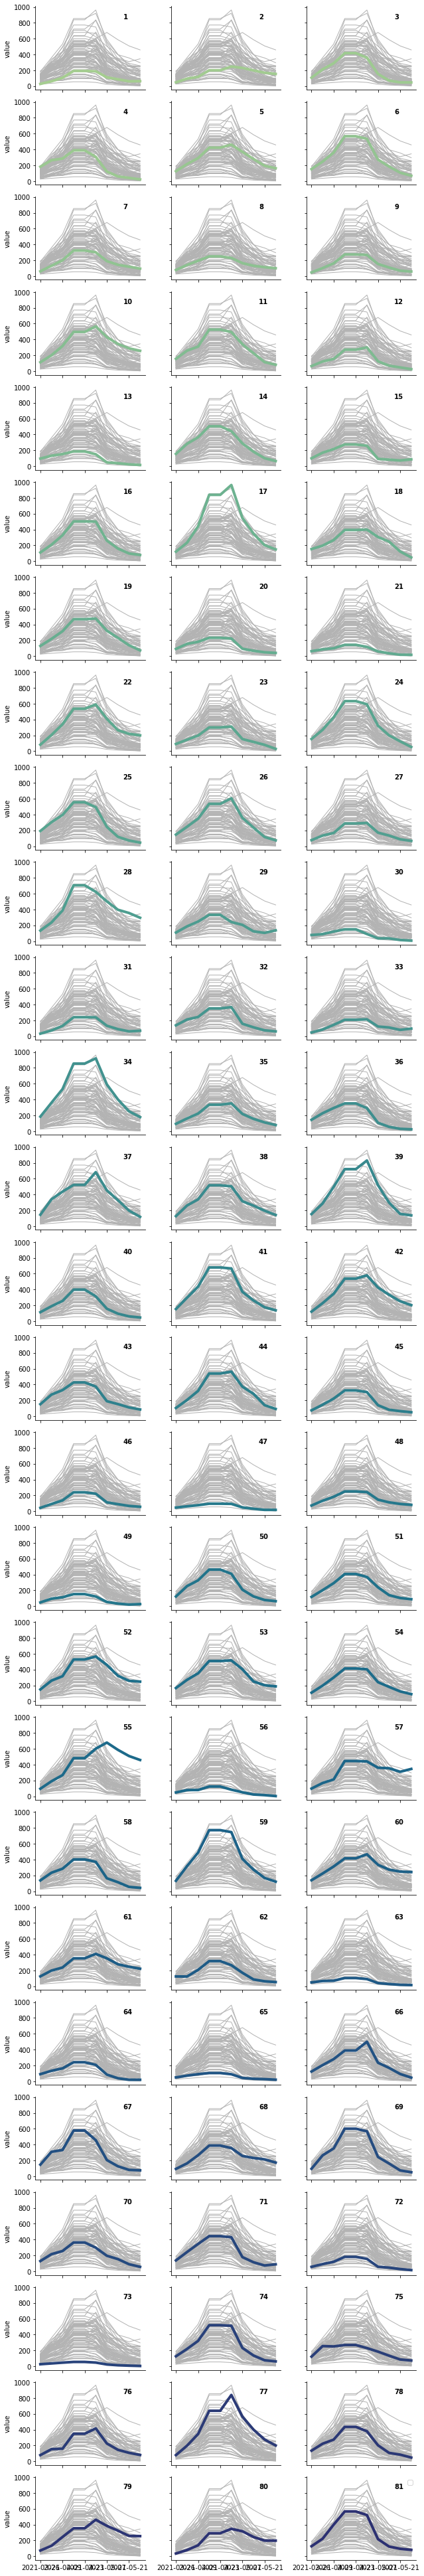

In [24]:
# Visualizing each city risk rate by plate_no

g = sns.relplot(data=riskmap,
                x='week',y='value',col='plate_no',hue='plate_no',
                kind='line',palette='crest',linewidth=4,zorder=5,
                col_wrap=3,height=2,aspect=1.5,legend=False,
)

for year, ax in g.axes_dict.items():
    ax.text(.8, .85, year, transform= ax.transAxes, fontweight='bold')
    
    sns.lineplot(
        data=riskmap, x='week', y='value', units='plate_no',
        estimator=None, color='.7', linewidth=1, ax=ax, 
    )
    

ax.set_xticks(ax.get_xticks()[::2])

g.set_titles('')
g.set_axis_labels('','value')
g.tight_layout()
ax.legend()